In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title 
from IPython.display import YouTubeVideo
YouTubeVideo('dxHL36aJvGU', width=600, height=400)

In [0]:
!unzip "/content/drive/My Drive/CSE472/data.zip" 

Archive:  /content/drive/My Drive/CSE472/data.zip
   creating: data/
   creating: data/LV/
  inflating: data/LV/PT_LV.txt       
  inflating: data/LV/LV.json         
  inflating: data/LV/place_id_LV.txt  
   creating: data/To/
  inflating: data/To/Toronto.json    
  inflating: data/To/PT_Toronto.txt  
  inflating: data/To/place_id_Toronto.txt  


In [0]:
!tar zxf "/content/drive/My Drive/CSE472/aspects.tar.gz" 

# I. Load the Data

In [0]:
import json
import os
import pickle
from tqdm import tqdm

In [0]:
with open('data/To/Toronto.json', 'r') as to_file:
    to_data = to_file.read()
    to_array  = json.loads(to_data)
    to_obj = {}
    for i in to_array:
        to_obj[i['business_id']] = i

to_pt_data = {}
with open('data/To/PT_Toronto.txt', 'r') as pt_to_file:
    for line in pt_to_file:
        try:
            lobj = json.loads(line.replace("'",'"').replace('"s ', "'s ").replace('"s"', "'s\""))
            to_pt_data[lobj['id']] = lobj
        except Exception as e:
            print(line)

{'id': 'ChIJHw8sEQM1K4gRQh3u2f9acek', 'name': "'ONO Poké Bar", 'address': '100 Western Battery Rd #2, Toronto, ON M6K 3S2, Canada', 'types': ['restaurant', 'food', 'point_of_interest', 'establishment'], 'coordinates': {'lat': 43.639185, 'lng': -79.415802}, 'rating': 4.6, 'rating_n': 248, 'international_phone_number': '+1 416-792-8992', 'populartimes': [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 58, 51, 31, 27, 31, 34, 31, 24, 17, 0, 0, 0]}, {'name': 'Tuesday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 44, 48, 20, 10, 10, 13, 20, 27, 24, 0, 0, 0]}, {'name': 'Wednesday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 55, 55, 27, 10, 10, 27, 48, 48, 27, 0, 0, 0]}, {'name': 'Thursday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 31, 31, 24, 17, 20, 27, 34, 37, 34, 0, 0, 0]}, {'name': 'Friday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 100, 72, 20, 24, 31, 34, 34, 31, 24, 0, 0, 0]}, {'name': 'Saturday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 31, 51, 44,

In [0]:
with open('data/To/place_id_Toronto.txt', 'r') as to_file:
    bid_place = json.load(to_file)

In [0]:
# Get the aspects
aspects = {}
for filename in os.listdir('./aspects'):
    bid = filename.split('.pkl')[0]
    with open('aspects/'+filename, 'rb') as aspect_file:
        apt = pickle.load(aspect_file)
        aspects[bid] = apt

## I.1. Join the different parts into one dictionary. Business+Popularity+Aspect Sentiments

In [0]:
tmp_aspects = {}
for k,v in aspects.items():
    t_obj = {}
    for sk, vk in v.items():
        t_obj[sk] = dict(vk)
    tmp_aspects[k] = t_obj
aspects = tmp_aspects

In [0]:
full_data = {}
for ka, va in aspects.items():
    try:
        if ka not in to_obj.keys() or ka not in bid_place.keys():
            print('%s not found in places' % ka)
            continue
        full_data[ka] = {}
        for ko, vo in to_obj[ka].items():
            full_data[ka][ko] = vo
        for kp, vp in to_pt_data[bid_place[ka]].items():
            full_data[ka][kp] = vp
        full_data[ka]['aspects'] = va
        if 'rating' not in full_data[ka].keys():
            del full_data[ka]
    except Exception as e:
        print(e)
        del full_data[ka] 



fE-dFRyFWP4ZiijhCEMxIg not found in places
P9IA7UuzjzmdBMsdDDhtsg not found in places
'ChIJccRicrEHK4cRLY3o0f_Z_hY'
omcQohJjl8jDIhLo0M6_cA not found in places
TgjpcqIhZ4ONmp1AaxDLPQ not found in places
JAtkdUt_gV1iXjwj9vs_Og not found in places
Y8PJQkkql6V2tQEvO0xbQw not found in places
ILpHHOfCvUa8MnaqELX-YA not found in places
Im07ZhnjeCNe6QalFD9S2Q not found in places
T6ha3lAVg7mjr6GTnH9V-A not found in places
MnagM9zYrvAssGpmAiFq2A not found in places
CZxAlrWOD4Mu2K7FoAcRaA not found in places
K41XnhvOVPUcLEUbMM4jSg not found in places
8AAHDz9VIAvq8XbKJHrSrg not found in places
uRSPHDMBtYedbBbbHd3gOA not found in places
'ChIJzfV3scE0K4gRvFLV1jM3A7o'
GwbKZhWqzZE4C_K1prXbAA not found in places
6AFe4y_ClT9D-CGGyikNQg not found in places
37joQpD9m5AIcrW1c8OBnQ not found in places
f4KJOcNMUSDGKvqm68CRiA not found in places
tZkUF9LI9oxtNsZtsbpfVg not found in places
1XCR1GxL44O2hg3ehRwtMA not found in places
5dDp6TU1hkkcBYpxrpNjPw not found in places
'ChIJf7hGKO40K4gRted7DlivcDg'
6J5avXp

In [0]:
len(full_data.keys())

838

# II. Create a Spatial hierarchy

For now, we will use Agglomerative Clustering (We can improve on this later on) 

In [0]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

In [0]:
# Get the locations of the businesses
locations = [(k, [v['latitude'], v['longitude']]) for k,v in full_data.items()]
loc_data = [x[1] for x in locations]

In [0]:
linkage_matrix = linkage(loc_data, method='ward')
algo_clustering = AgglomerativeClustering(compute_full_tree=True).fit(loc_data)

In [0]:
ii = itertools.count(len(loc_data))
agglo_tree = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in algo_clustering.children_]

In [0]:
agglo_tree_dict = {}

for node in agglo_tree:
    agglo_tree_dict[node['node_id']] = node

def get_tree_indices(tree_dict, node_id, num_leaves):
    indices = []
    if node_id < num_leaves:
        return [node_id]
    
    indices_left = get_tree_indices(tree_dict, tree_dict[node_id]['left'], num_leaves)
    indices_right = get_tree_indices(tree_dict, tree_dict[node_id]['right'], num_leaves)
    return indices_left + indices_right

for node in agglo_tree:
    agglo_tree_dict[node['node_id']]['indices'] = get_tree_indices(agglo_tree_dict, node['node_id'], len(loc_data))

        

# III. Find Confounders for each level in the heirarchy(WIP)

In [0]:
!pip install --quiet tensorflow_probability

In [0]:
import tensorflow as tf
import numpy as np
import numpy.random as npr
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import statsmodels.api as sm

from tensorflow_probability import edward2 as ed
from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix
from scipy import sparse, stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import matplotlib
matplotlib.rcParams.update({'font.sans-serif' : 'Helvetica',
                            'axes.labelsize': 10,
                            'xtick.labelsize' : 6,
                            'ytick.labelsize' : 6,
                            'axes.titlesize' : 10})
import matplotlib.pyplot as plt

import seaborn as sns
color_names = ["windows blue",
               "amber",
               "crimson",
               "faded green",
               "dusty purple",
               "greyish"]
colors = sns.xkcd_palette(color_names)
sns.set(style="white", palette=sns.xkcd_palette(color_names), color_codes = False)

In [0]:
!pip show tensorflow
!pip show tensorflow_probability

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: grpcio, termcolor, wrapt, keras-applications, google-pasta, protobuf, tensorflow-estimator, absl-py, opt-einsum, wheel, astor, six, gast, keras-preprocessing, tensorboard, numpy
Required-by: stable-baselines, magenta, fancyimpute
Name: tensorflow-probability
Version: 0.7.0
Summary: Probabilistic modeling and statistical inference in TensorFlow
Home-page: http://github.com/tensorflow/probability
Author: Google LLC
Author-email: no-reply@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: cloudpickle, six, decorator, numpy
Required-by: tensorflow-gan, tensor2tensor, magenta, kfac, dm-sonnet


In [0]:
# set random seed so everyone gets the same number
import random
randseed = 1234
print("random seed: ", randseed)
random.seed(randseed)
np.random.seed(randseed)
tf.set_random_seed(randseed)

random seed:  1234


In [0]:
def get_aspect_data(full_data):
    # Normalize the ascpect data
    full_data_aspects = [(y['aspects']) for x,y in full_data.items()]
    aspect_ratio_data = []
    for i in full_data_aspects:
        aspect_ratio_obj = {}
        for k, v in i.items():
            if v == {}:
                # aspect_ratio_obj[k+'_neg'] = 0.5
                aspect_ratio_obj[k+'_pos'] = 0.5
                continue
            try:
                if 'pos' not in v.keys():
                    v['pos'] = 0
                elif 'neg' not in v.keys():
                    v['neg'] = 0
                total = v['pos']+v['neg']
                if total == 0:
                    # aspect_ratio_obj[k+'_neg'] = 0.5
                    aspect_ratio_obj[k+'_pos'] = 0.5
                    continue
                # aspect_ratio_obj[k+'_neg'] = v['neg']/total
                aspect_ratio_obj[k+'_pos'] = v['pos']/total
            except Exception as e:
                print('Error')
                print(v)
        aspect_ratio_data.append(aspect_ratio_obj)
    return aspect_ratio_data




def variational_model(qw_mean, qw_stddv, qz_mean, qz_stddv):
    qw = ed.Normal(loc=qw_mean, scale=qw_stddv, name="qw")
    qz = ed.Normal(loc=qz_mean, scale=qz_stddv, name="qz")
    return qw, qz

def target(w, z, log_joint, data_dim, latent_dim, num_datapoints, stddv_datapoints, x_train):
    """Unnormalized target density as a function of the parameters."""
    return log_joint(data_dim=data_dim,
                   latent_dim=latent_dim,
                   num_datapoints=num_datapoints,
                   stddv_datapoints=stddv_datapoints,
                   w=w, z=z, x=x_train)

def target_q(qw, qz, log_q, qw_mean, qw_stddv, qz_mean, qz_stddv):
    return log_q(qw_mean=qw_mean, qw_stddv=qw_stddv,
               qz_mean=qz_mean, qz_stddv=qz_stddv,
               qw=qw, qz=qz)
    
def replace_latents(w, z):

    def interceptor(rv_constructor, *rv_args, **rv_kwargs):
        """Replaces the priors with actual values to generate samples from."""
        name = rv_kwargs.pop("name")
        if name == "w":
            rv_kwargs["value"] = w
        elif name == "z":
            rv_kwargs["value"] = z
        return rv_constructor(*rv_args, **rv_kwargs)

    return interceptor

def get_confounders(data):
    aspect_ratio_data = get_aspect_data(data)
    dfX = pd.DataFrame(aspect_ratio_data)
    dfy = np.array([y['rating']/5 for x,y in data.items()])
    # standardize the data for PPCA
    X = np.array((dfX - dfX.mean())/dfX.std())

    holdout_portion = 0.2 
    num_datapoints, data_dim = X.shape
    n_holdout = int(holdout_portion * num_datapoints * data_dim)

    holdout_row = np.random.randint(num_datapoints, size=n_holdout)
    holdout_col = np.random.randint(data_dim, size=n_holdout)
    holdout_mask = (sparse.coo_matrix((np.ones(n_holdout), \
                                (holdout_row, holdout_col)), \
                                shape = X.shape)).toarray()

    holdout_subjects = np.unique(holdout_row)

    x_train = np.multiply(1-holdout_mask, X)
    x_vad = np.multiply(holdout_mask, X)

    def ppca_model(data_dim, latent_dim, num_datapoints, stddv_datapoints):
        w = ed.Normal(loc=tf.zeros([latent_dim, data_dim]),
                    scale=tf.ones([latent_dim, data_dim]),
                    name="w")  # parameter
        z = ed.Normal(loc=tf.zeros([num_datapoints, latent_dim]),
                    scale=tf.ones([num_datapoints, latent_dim]), 
                    name="z")  # local latent variable / substitute confounder
        x = ed.Normal(loc=tf.multiply(tf.matmul(z, w), 1-holdout_mask),
                    scale=stddv_datapoints * tf.ones([num_datapoints, data_dim]),
                    name="x")  # (modeled) data
        return x, (w, z)

    log_joint = ed.make_log_joint_fn(ppca_model)

    latent_dim = 2 
    stddv_datapoints = 0.1



    model = ppca_model(data_dim=data_dim,
                    latent_dim=latent_dim,
                    num_datapoints=num_datapoints,
                    stddv_datapoints=stddv_datapoints)
    
    log_q = ed.make_log_joint_fn(variational_model)

    qw_mean = tf.Variable(np.ones([latent_dim, data_dim]), dtype=tf.float32)
    qz_mean = tf.Variable(np.ones([num_datapoints, latent_dim]), dtype=tf.float32)
    qw_stddv = tf.nn.softplus(tf.Variable(-4 * np.ones([latent_dim, data_dim]), dtype=tf.float32))
    qz_stddv = tf.nn.softplus(tf.Variable(-4 * np.ones([num_datapoints, latent_dim]), dtype=tf.float32))

    qw, qz = variational_model(qw_mean=qw_mean, qw_stddv=qw_stddv,
                            qz_mean=qz_mean, qz_stddv=qz_stddv)


    energy = target(qw, qz, log_joint, data_dim, latent_dim, num_datapoints, stddv_datapoints, x_train)
    entropy = -target_q(qw, qz, log_q, qw_mean, qw_stddv, qz_mean, qz_stddv)

    elbo = energy + entropy


    optimizer = tf.train.AdamOptimizer(learning_rate = 0.05)
    train = optimizer.minimize(-elbo)

    init = tf.global_variables_initializer()

    t = []

    num_epochs = 500

    with tf.Session() as sess:
        sess.run(init)

        for i in range(num_epochs):
            sess.run(train)
            if i % 5 == 0:
                t.append(sess.run([elbo]))

            w_mean_inferred = sess.run(qw_mean)
            w_stddv_inferred = sess.run(qw_stddv)
            z_mean_inferred = sess.run(qz_mean)
            z_stddv_inferred = sess.run(qz_stddv)
            
    # print("Inferred axes:")
    # print(w_mean_inferred)
    # print("Standard Deviation:")
    # print(w_stddv_inferred)

    # n_rep = 100 # number of replicated datasets we generate
    # holdout_gen = np.zeros((n_rep,*(x_train.shape)))

    # for i in range(n_rep):
    #     w_sample = npr.normal(w_mean_inferred, w_stddv_inferred)
    #     z_sample = npr.normal(z_mean_inferred, z_stddv_inferred)

    #     with ed.interception(replace_latents(w_sample, z_sample)):
    #         generate = ppca_model(
    #             data_dim=data_dim, latent_dim=latent_dim,
    #             num_datapoints=num_datapoints, stddv_datapoints=stddv_datapoints)

    #     with tf.Session() as sess:
    #         x_generated, _ = sess.run(generate)

    #     # look only at the heldout entries
    #     holdout_gen[i] = np.multiply(x_generated, holdout_mask)

    # n_eval = 100 # we draw samples from the inferred Z and W
    # obs_ll = []
    # rep_ll = []
    # for j in range(n_eval):
    #     w_sample = npr.normal(w_mean_inferred, w_stddv_inferred)
    #     z_sample = npr.normal(z_mean_inferred, z_stddv_inferred)
        
    #     holdoutmean_sample = np.multiply(z_sample.dot(w_sample), holdout_mask)
    #     obs_ll.append(np.mean(stats.norm(holdoutmean_sample, \
    #                         stddv_datapoints).logpdf(x_vad), axis=1))

    #     rep_ll.append(np.mean(stats.norm(holdoutmean_sample, \
    #                         stddv_datapoints).logpdf(holdout_gen),axis=2))
        
    # obs_ll_per_zi, rep_ll_per_zi = np.mean(np.array(obs_ll), axis=0), np.mean(np.array(rep_ll), axis=0)
    # pvals = np.array([np.mean(rep_ll_per_zi[:,i] < obs_ll_per_zi[i]) for i in range(num_datapoints)])
    # holdout_subjects = np.unique(holdout_row)
    # overall_pval = np.mean(pvals[holdout_subjects])

    # approximate the (random variable) substitute confounders with their inferred mean.
    Z_hat = z_mean_inferred 
    # augment the regressors to be both the assigned causes X and the substitute confounder Z
    X_aug = np.column_stack([X, Z_hat])

    # holdout some data from prediction later
    X_train, X_test, y_train, y_test = train_test_split(X_aug, dfy, test_size=0.05, random_state=0)

    dcfX_train = sm.add_constant(X_train)
    dcfols_model = sm.OLS(y_train, dcfX_train)
    dcfresult = dcfols_model.fit()

    res = pd.DataFrame({"causal_mean": dcfresult.params[:data_dim+1], \
                  "causal_std": dcfresult.bse[:data_dim+1], \
                  "causal_025": dcfresult.conf_int()[:data_dim+1,0], \
                  "causal_975": dcfresult.conf_int()[:data_dim+1,1], \
                   "causal_pval": dcfresult.pvalues[:data_dim+1]})
    res["causal_sig"] = (res["causal_pval"] < 0.05)
    res = res.T
    res.columns = np.concatenate([["intercept"], np.array(dfX.columns)])
    res = res.T

    return res


def get_confounders_popular(data):
    aspect_ratio_data = get_aspect_data(data)
    dfX = pd.DataFrame(aspect_ratio_data)
    dfy = np.array([y['populartimes'][5]['data'][13]/100 for x,y in data.items()])
    # standardize the data for PPCA
    X = np.array((dfX - dfX.mean())/dfX.std())

    holdout_portion = 0.2 
    num_datapoints, data_dim = X.shape
    n_holdout = int(holdout_portion * num_datapoints * data_dim)

    holdout_row = np.random.randint(num_datapoints, size=n_holdout)
    holdout_col = np.random.randint(data_dim, size=n_holdout)
    holdout_mask = (sparse.coo_matrix((np.ones(n_holdout), \
                                (holdout_row, holdout_col)), \
                                shape = X.shape)).toarray()

    holdout_subjects = np.unique(holdout_row)

    x_train = np.multiply(1-holdout_mask, X)
    x_vad = np.multiply(holdout_mask, X)

    def ppca_model(data_dim, latent_dim, num_datapoints, stddv_datapoints):
        w = ed.Normal(loc=tf.zeros([latent_dim, data_dim]),
                    scale=tf.ones([latent_dim, data_dim]),
                    name="w")  # parameter
        z = ed.Normal(loc=tf.zeros([num_datapoints, latent_dim]),
                    scale=tf.ones([num_datapoints, latent_dim]), 
                    name="z")  # local latent variable / substitute confounder
        x = ed.Normal(loc=tf.multiply(tf.matmul(z, w), 1-holdout_mask),
                    scale=stddv_datapoints * tf.ones([num_datapoints, data_dim]),
                    name="x")  # (modeled) data
        return x, (w, z)

    log_joint = ed.make_log_joint_fn(ppca_model)

    latent_dim = 2 
    stddv_datapoints = 0.1



    model = ppca_model(data_dim=data_dim,
                    latent_dim=latent_dim,
                    num_datapoints=num_datapoints,
                    stddv_datapoints=stddv_datapoints)
    
    log_q = ed.make_log_joint_fn(variational_model)

    qw_mean = tf.Variable(np.ones([latent_dim, data_dim]), dtype=tf.float32)
    qz_mean = tf.Variable(np.ones([num_datapoints, latent_dim]), dtype=tf.float32)
    qw_stddv = tf.nn.softplus(tf.Variable(-4 * np.ones([latent_dim, data_dim]), dtype=tf.float32))
    qz_stddv = tf.nn.softplus(tf.Variable(-4 * np.ones([num_datapoints, latent_dim]), dtype=tf.float32))

    qw, qz = variational_model(qw_mean=qw_mean, qw_stddv=qw_stddv,
                            qz_mean=qz_mean, qz_stddv=qz_stddv)


    energy = target(qw, qz, log_joint, data_dim, latent_dim, num_datapoints, stddv_datapoints, x_train)
    entropy = -target_q(qw, qz, log_q, qw_mean, qw_stddv, qz_mean, qz_stddv)

    elbo = energy + entropy


    optimizer = tf.train.AdamOptimizer(learning_rate = 0.05)
    train = optimizer.minimize(-elbo)

    init = tf.global_variables_initializer()

    t = []

    num_epochs = 500

    with tf.Session() as sess:
        sess.run(init)

        for i in range(num_epochs):
            sess.run(train)
            if i % 5 == 0:
                t.append(sess.run([elbo]))

            w_mean_inferred = sess.run(qw_mean)
            w_stddv_inferred = sess.run(qw_stddv)
            z_mean_inferred = sess.run(qz_mean)
            z_stddv_inferred = sess.run(qz_stddv)
            
    # print("Inferred axes:")
    # print(w_mean_inferred)
    # print("Standard Deviation:")
    # print(w_stddv_inferred)

    # n_rep = 100 # number of replicated datasets we generate
    # holdout_gen = np.zeros((n_rep,*(x_train.shape)))

    # for i in range(n_rep):
    #     w_sample = npr.normal(w_mean_inferred, w_stddv_inferred)
    #     z_sample = npr.normal(z_mean_inferred, z_stddv_inferred)

    #     with ed.interception(replace_latents(w_sample, z_sample)):
    #         generate = ppca_model(
    #             data_dim=data_dim, latent_dim=latent_dim,
    #             num_datapoints=num_datapoints, stddv_datapoints=stddv_datapoints)

    #     with tf.Session() as sess:
    #         x_generated, _ = sess.run(generate)

    #     # look only at the heldout entries
    #     holdout_gen[i] = np.multiply(x_generated, holdout_mask)

    # n_eval = 100 # we draw samples from the inferred Z and W
    # obs_ll = []
    # rep_ll = []
    # for j in range(n_eval):
    #     w_sample = npr.normal(w_mean_inferred, w_stddv_inferred)
    #     z_sample = npr.normal(z_mean_inferred, z_stddv_inferred)
        
    #     holdoutmean_sample = np.multiply(z_sample.dot(w_sample), holdout_mask)
    #     obs_ll.append(np.mean(stats.norm(holdoutmean_sample, \
    #                         stddv_datapoints).logpdf(x_vad), axis=1))

    #     rep_ll.append(np.mean(stats.norm(holdoutmean_sample, \
    #                         stddv_datapoints).logpdf(holdout_gen),axis=2))
        
    # obs_ll_per_zi, rep_ll_per_zi = np.mean(np.array(obs_ll), axis=0), np.mean(np.array(rep_ll), axis=0)
    # pvals = np.array([np.mean(rep_ll_per_zi[:,i] < obs_ll_per_zi[i]) for i in range(num_datapoints)])
    # holdout_subjects = np.unique(holdout_row)
    # overall_pval = np.mean(pvals[holdout_subjects])

    # approximate the (random variable) substitute confounders with their inferred mean.
    Z_hat = z_mean_inferred 
    # augment the regressors to be both the assigned causes X and the substitute confounder Z
    X_aug = np.column_stack([X, Z_hat])

    # holdout some data from prediction later
    X_train, X_test, y_train, y_test = train_test_split(X_aug, dfy, test_size=0.05, random_state=0)

    dcfX_train = sm.add_constant(X_train)
    dcfols_model = sm.OLS(y_train, dcfX_train)
    dcfresult = dcfols_model.fit()

    res = pd.DataFrame({"causal_mean": dcfresult.params[:data_dim+1], \
                  "causal_std": dcfresult.bse[:data_dim+1], \
                  "causal_025": dcfresult.conf_int()[:data_dim+1,0], \
                  "causal_975": dcfresult.conf_int()[:data_dim+1,1], \
                   "causal_pval": dcfresult.pvalues[:data_dim+1]})
    res["causal_sig"] = (res["causal_pval"] < 0.05)
    res = res.T
    res.columns = np.concatenate([["intercept"], np.array(dfX.columns)])
    res = res.T

    return res


In [0]:
HEIRARCHY_NODE_THRESHOLD = 100
# Get hierarchy nodes with enough node (>100)
h_nodes = [v['indices'] for k,v in agglo_tree_dict.items() if len(v['indices'])>HEIRARCHY_NODE_THRESHOLD]



In [0]:
spatial_confounders = []
for h_indices in tqdm(h_nodes):
    # Get subset of data representing hierarchy
    h_data = {}
    h_keys = [locations[x][0] for x in h_indices]
    for h_key in h_keys:
        h_data[h_key] = full_data[h_key]
    confounder_stats = get_confounders(h_data)
    spatial_confounders.append({
        'confounders': confounder_stats,
        'locations': [loc_data[i] for i in h_indices]
    })

100%|██████████| 106/106 [16:57<00:00, 17.14s/it]


In [0]:
with open('spatial_confounders_rating.pkl', 'wb') as sc_file:
    pickle.dump(spatial_confounders, sc_file)

In [0]:
spatial_confounders_pop = []
for h_indices in tqdm(h_nodes):
    # Get subset of data representing hierarchy
    h_data = {}
    h_keys = [locations[x][0] for x in h_indices]
    for h_key in h_keys:
        if 'populartimes' in full_data[h_key].keys():
            h_data[h_key] = full_data[h_key]
    confounder_stats = get_confounders_popular(h_data)
    spatial_confounders_pop.append({
        'confounders': confounder_stats,
        'locations': [loc_data[i] for i in h_indices]
    })

100%|██████████| 106/106 [48:48<00:00, 38.44s/it]


In [0]:
with open('spatial_confounders_popularity.pkl', 'wb') as sc_file:
    pickle.dump(spatial_confounders_pop, sc_file)

In [0]:
!cp *.pkl /content/drive/My\ Drive/CSE472/

In [0]:
# Convert results to json
for i, v in enumerate(spatial_confounders):
    spatial_confounders[i]['confounders'] = v['confounders'].to_json(orient='columns')

for i, v in enumerate(spatial_confounders_pop):
    spatial_confounders_pop[i]['confounders'] = v['confounders'].to_json(orient='columns')


In [0]:
# Convert results to json
for i, v in enumerate(spatial_confounders):
    spatial_confounders[i]['confounders'] = json.loads(v['confounders'])

for i, v in enumerate(spatial_confounders_pop):
    spatial_confounders_pop[i]['confounders'] = json.loads(v['confounders'])

In [0]:
with open('spatial_confounders_rating.json', 'w') as sc_file:
    json.dump(spatial_confounders, sc_file)

with open('spatial_confounders_popularity.json', 'w') as sc_file:
    json.dump(spatial_confounders_pop, sc_file)

In [0]:
!cp *.json /content/drive/My\ Drive/CSE472/

# FIN

We can use data in 'spatial_confounders' to create vizualizations

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


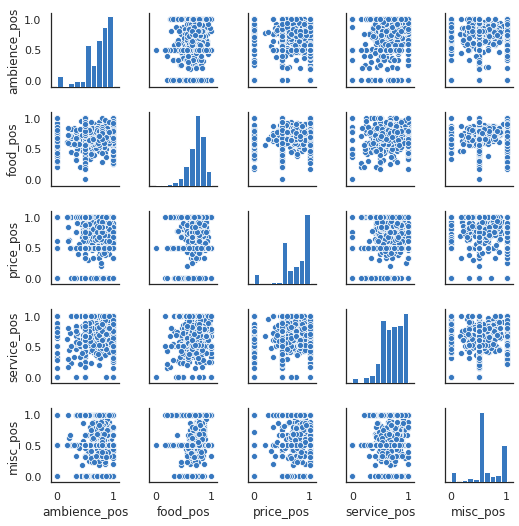

In [0]:
sns.pairplot(df, size=1.5)